In [1]:
import json
import requests

import pandas as pd
from pandas.io.json import json_normalize
import datetime,time
from datetime import datetime
from math import atan2,degrees
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#for animation
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
from descartes import PolygonPatch
import shapefile
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

In [4]:
import json
import requests

In [5]:
import pandas as pd
from pandas.io.json import json_normalize
import datetime,time
from datetime import datetime
from math import atan2,degrees
import numpy as np

import matplotlib.pyplot as plt

In [6]:
plt.style.use('seaborn')

In [7]:
today = datetime.today().strftime('%b-%d')

In [8]:
today

'Jun-01'

In [9]:
sf=shapefile.Reader('..\\indiamap\\ind_adm3')
shape=gpd.read_file('..\\indiamap\\ind_adm3.shp')

In [51]:
url = "https://api.covid19india.org/districts_daily.json"
data = requests.get(url)
content = data.content

In [52]:
jdata=json.loads(content)

In [12]:
gdf2 = gpd.read_file(f"..\\indiamap\\ind_adm2.shp", encoding='utf-8')
gdf2.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,105,IND,India,2,Andhra Pradesh,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,105,IND,India,2,Andhra Pradesh,5,Cuddapah,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."


In [13]:
gdf = gpd.read_file(f"..//indiamap/india_st.shp", encoding='utf-8')
gdf2.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,105,IND,India,2,Andhra Pradesh,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,105,IND,India,2,Andhra Pradesh,5,Cuddapah,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."


In [14]:
l=[]
def print_dict(v, prefix=None):
    if isinstance(v, dict):
        for k, v2 in v.items():
            if prefix is None:
                p2 = "{}".format( k)
            else:
                p2 = "{},{}".format(prefix, k)
            print_dict(v2, p2)
    elif isinstance(v, list):
        for i, v2 in enumerate(v):
            p2 = "{},{}".format(prefix, i)
            if v2['date']:
                p2 = "{},{}".format(prefix, v2['date'])
            print_dict(v2, p2)
    else:
        l.append('{},{}'.format(prefix, repr(v)))

In [15]:
print_dict(jdata)

In [16]:
df=pd.DataFrame([sub.split(",") for sub in l])

In [88]:
df.loc[(df[1] == 'Delhi') & (df[2] == 'Unknown'), 2] = 'New Delhi'

In [92]:
d=df[2].unique()

In [93]:
g=gdf2.loc[gdf2['NAME_2'].isin(d)][['NAME_2','geometry']]

In [94]:
c_df=df.merge(g, left_on=2, right_on='NAME_2')

In [95]:
for i in c_df.index:
    poly=c_df.loc[i]['geometry']
    rowIndex = c_df.index[i]
    if poly.geom_type == 'MultiPolygon':
        c_df.loc[rowIndex,'lng']=MultiPolygon(poly).centroid.x
        c_df.loc[rowIndex,'lat']=MultiPolygon(poly).centroid.y
    elif poly.geom_type == 'Polygon':
        c_df.loc[rowIndex,'lng']=Polygon(poly).centroid.x
        c_df.loc[rowIndex,'lat']=Polygon(poly).centroid.y
    else:
        raise IOError('Shape is not a polygon.')

In [96]:
c_df=gpd.GeoDataFrame(
    c_df, geometry=gpd.points_from_xy(c_df.lng.astype('float'), c_df.lat.astype('float')))

In [97]:
c_df=c_df[(c_df[4]=='active')]

In [98]:
c_df=c_df[[2,3,4,5,'lat','lng','geometry']]

In [99]:
c_df.loc[5]=pd.to_numeric(c_df[5])

C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


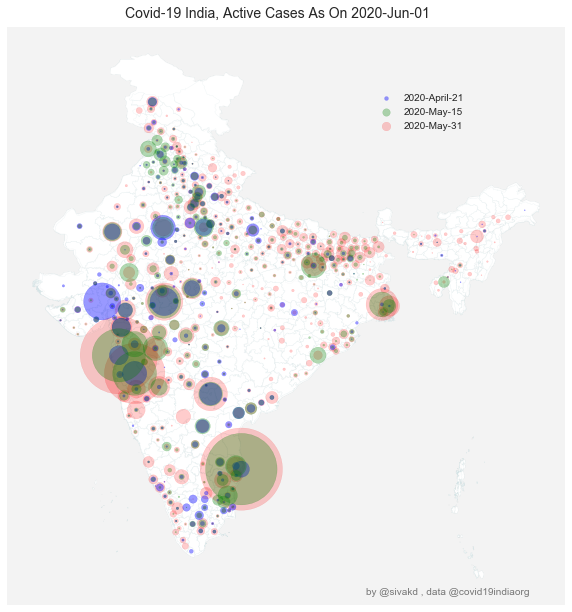

In [100]:
dt=['2020-04-21','2020-05-15','2020-05-31']
fig, ax = plt.subplots(figsize=(10, 12))

c=c_df[c_df[3]==dt[0]]
gdf.plot(ax=ax,color='white', edgecolor='#d5e4e6')
gdf2.plot(ax=ax,color='white',edgecolor='#d5e4e6',alpha=0.5)
l1=ax.scatter(c.lng,c.lat,  s=c[5].astype(int),alpha=0.4,color='blue',zorder=10)
#l1=c.plot(ax=ax,  markersize=c[5].astype(int), alpha=0.8,color='blue')

c=c_df[c_df[3]==dt[1]]
gdf.plot(ax=ax,color='white', edgecolor='#d5e4e6')
gdf2.plot(ax=ax,color='white',edgecolor='#d5e4e6',alpha=0.5)
l2=ax.scatter(c.lng,c.lat,  s=c[5].astype(int),alpha=0.3,color='green',zorder=10)
#l2=c.plot(ax=ax,  markersize=c[5].astype(int), facecolors='none',alpha=0.4,color='green')

c=c_df[c_df[3]==dt[2]]
gdf.plot(ax=ax,color='white', edgecolor='#f3f3f3')
gdf2.plot(ax=ax,color='white',edgecolor='#d5e4e6',alpha=0.5)
l3=ax.scatter(c.lng,c.lat,  s=c[5].astype(int),alpha=0.2,color='red',zorder=5)
#l3=c.plot(ax=ax,  markersize=c[5].astype(int), facecolors='none',alpha=0.3,color='red')

ax.set_facecolor('#f3f3f3') 
ax.set_yticks([])
ax.set_xticks([])

for spine in plt.gca().spines.values():
  spine.set_visible(False)

fig.legend(handles = [l1,l2,l3] , labels=['2020-April-21','2020-May-15','2020-May-31'],
           markerscale=0.15, loc=(0.65,0.78))

fig.subplots_adjust(wspace=0.008,hspace=-0.525)
fig.suptitle("Covid-19 India, {} As On 2020-{}".format("Active Cases",today),size=14,y=0.86)
fig.text(0.85, 0.18, 'by @sivakd , data @covid19indiaorg', ha='right',
            color='#777777', bbox=dict(facecolor='#f3f3f3', alpha=0.5, edgecolor='white'))

plt.savefig("The-Great-Indian-Lockdown-Geo-Analysis-all-in-one-{}{}".format(today,'.png'),
            facecolor='#f3f3f3',bbox_inches = "tight",)

C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anaconda3\envs\torch1.3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Siva\Anacon

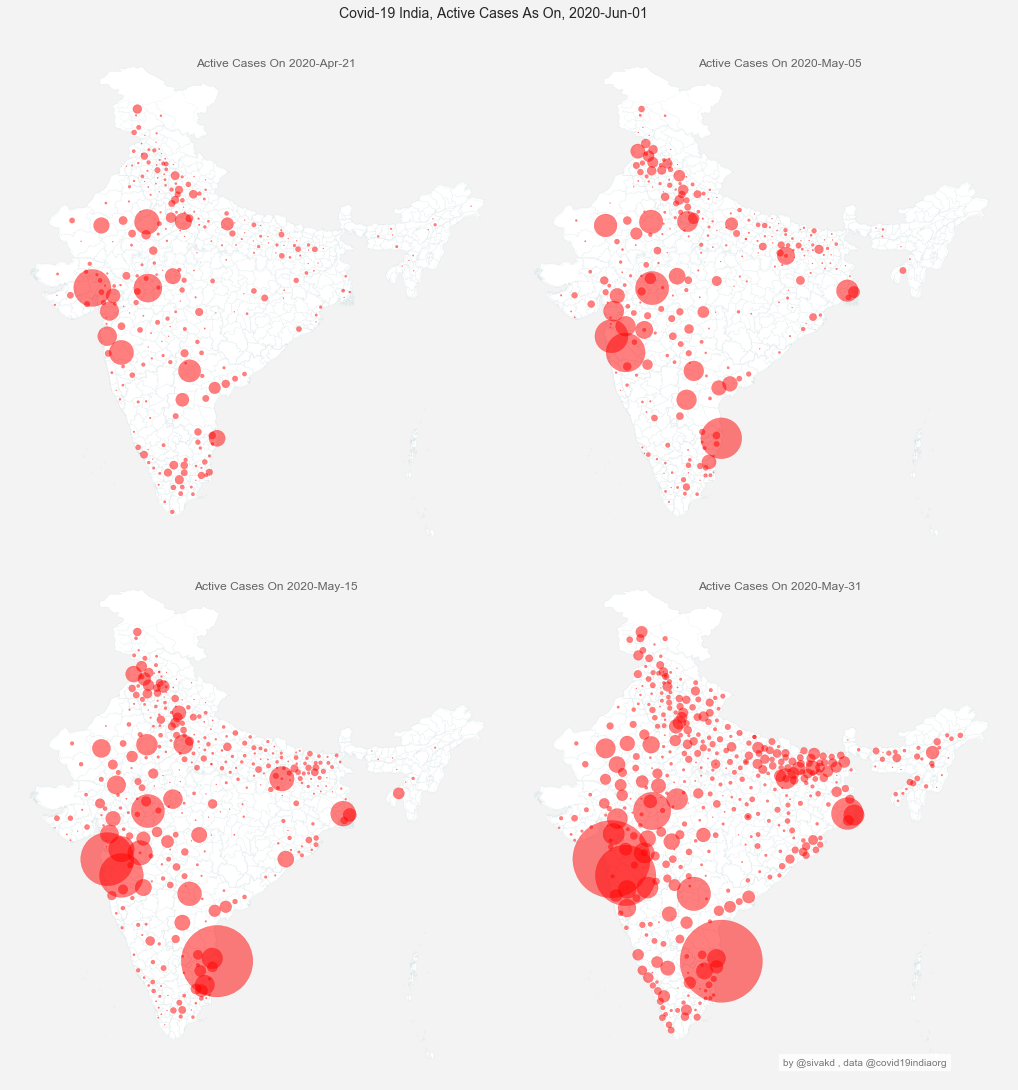

In [101]:
dt=['2020-04-21','2020-05-05','2020-05-15','2020-05-31']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,30), constrained_layout=True, 
                                             sharex=False, sharey=False)
i=0
for ax in axes.flatten():
    c=c_df[c_df[3]==dt[i]]
    gdf.plot(ax=ax,color='white', edgecolor='#d5e4e6')
    gdf2.plot(ax=ax,color='white',edgecolor='#d5e4e6',alpha=0.5)
    l1=ax.scatter(c.lng,c.lat,  s=c[5].astype(int),alpha=0.5,color='red',zorder=10)
    #ax.title.set_text('On {}'.format(dt[i]))
    on=datetime.strptime(dt[i],'%Y-%m-%d').strftime('%Y-%b-%d')
    ax.text(84,37,'Active Cases On {}'.format(on),alpha=0.7,fontsize=12,ha='center')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_facecolor('#f3f3f3') 
    #ax.set_frame_on(False)
    i=i+1

fig.text(0.85, 0.27, 'by @sivakd , data @covid19indiaorg', ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

fig.subplots_adjust(wspace=0.008,hspace=-0.528)
fig.suptitle("Covid-19 India, {} As On, 2020-{}".format("Active Cases",today),size=14,y=0.76)
fig.patch.set_facecolor('#f3f3f3')

plt.savefig("The-Great-Indian-Lockdown-Geo-Analysis-{}{}".format(today,'.png'),
            facecolor='#f3f3f3',bbox_inches = "tight",)

plt.show()

In [27]:
datetime.strptime('2020-05-15','%Y-%m-%d').strftime('%Y-%b-%d')

'2020-May-15'